The purpose of this analysis is to predict the factors (variables) that increased the survivability on the Titanic. I hypothesize that sex, socio-economic status and age will all play a factor a passenger’s survivability.  The data set is not a complete representation of the passengers on the Titanic. Also, there is missing data. Due to this, the findings will be tentative, at best. A more complete data set is necessary to report more concussively on survivability. 

Using the data, the following questions could be posed:

Question 1: Does Socio-Economic status have an effect of survivability?  
Question 2: Does age have an effect of survivability?  
Question 3: Does sex have an effect of survivability?

I chose to answer Question 1,  Does Socio-Economic status have an effect of survivability, with this analysis.

In [134]:
## Import Python Packages
## Data Analysis
import numpy as np
import pandas as pd

## Visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
%matplotlib inline

In [136]:
##import CSV file
data_df = pd.read_csv("titanic-data.csv")

In [137]:
##display available data
data_df.head(892)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#Data Dictionary

Variable	|Definition	 |                                         Key
------------ | ------------|------------
survival	|Survival	                                          |0 = No, 1 = Yes
pclass	|Ticket class	                                         | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	|Sex	|
Age	|Age in years	|
sibsp	|# of siblings / spouses aboard the Titanic	|
parch	|# of parents / children aboard the Titanic	|
ticket	|Ticket number	|
fare	|Passenger fare	|
cabin	|Cabin number	|
embarked	|Port of Embarkation	                                  | C = Cherbourg, Q = Queenstown, S = Southampton

##Variable Notes

**pclass**: *A proxy for socio-economic status*
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
**Sibling** = brother, sister, stepbrother, stepsister
**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way..  
**Parent** = mother, father  
**Child** = daughter, son, stepdaughter, stepson  
*Some children travelled only with a nanny, therefore parch=0 for them.*

(Kaggle.com, 2017)

In [138]:
##find data types
print data_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [139]:
## Since I am analyzing of age, sex or socioeconomic status affect survivability, I will drop unneeded columns.
data_df = data[['Survived','Pclass','Sex','Age','SibSp','Parch']]
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [140]:
##Used to find the min, max, and median of ages
data_df.median()
print data_df.median()
data_df.describe()

Survived     0.0
Pclass       3.0
Age         28.0
SibSp        0.0
Parch        0.0
dtype: float64


,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


This tells us that the youngest passanger was just over 4 month old while the oldest passanger was 80. The average age (median age) was 28. Because "Age" contains NaN values, I will replace those with the median age.  

In [141]:
data_df['Age'].round(1).inplace=True
data_df['Age'].fillna(value=data_df['Age'].median(), inplace=True)
data_df.median()
print data_df.median()
data_df.describe()

Survived     0.0
Pclass       3.0
Age         28.0
SibSp        0.0
Parch        0.0
dtype: float64


,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [142]:
data_df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,28.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [143]:
def correlation(x,y):
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

## **Question 1: Does Socio-Economic status have an effect of survivability?**

In [144]:
print '*****PCLASS vs. SURVIVED*****'
print data_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


*****PCLASS vs. SURVIVED*****
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [145]:
corr_pclass = correlation(data_df['Pclass'], data_df['Survived'])
print "The Pearson's r between Pclass and Survived is {}.".format(corr_pclass)

The Pearson's r between Pclass and Survived is -0.338481035961.


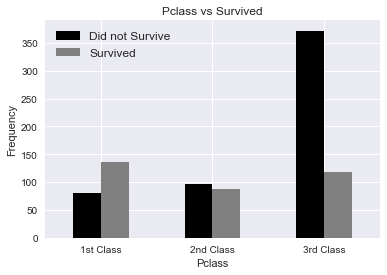

In [146]:
pd.crosstab(data_df['Pclass'], data_df['Survived']).plot(kind='bar', color=['black','grey'])
ax = plt.gca()
ax.set_xticklabels(('1st Class','2nd Class', '3rd Class'),rotation=0)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title("Pclass vs Survived")
plt.legend(('Did not Survive','Survived'),prop={'size': 12})

plt.show()

### Answer: Based on the above analysis, 63% of the 1st Class survived, 47% of the 2nd Class survived, while only 24% of the 3rd Class survived. Using this data and the Pearson's r value, the data shows that there is a corralation between Socio-economic class and survivability.   As the Pclass increases, so does the survivability.

In [148]:

#Analysing number of survivors across different ages

survived = data_df[data_df['Survived'] == 0]
perished = data_df[data_df['Survived'] == 1]
pass_class = range(0,90,10)
plt.hist(perished['Pclass'],bins = perished = 0.5,label = 'Perished')
plt.hist(survived['Pclass'],bins = pass_class,alpha = 0.5,label = 'Survived')
plt.xlabel('Pclass', fontweight='bold' )
plt.ylabel('Number of Survivors', fontweight='bold')
plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-148-ad0b4c0ba146>, line 7)